# Nettoyage des données

Après l'analyse exploratoire, on va nettoyer les données.

## Sommaire
* [Gestion des outliers](#chapter1)
* [Gestion des valeurs manquantes](#chapter2)
    * [Les types 'object'](#section_2_1)
    * [Les types 'float64'](#section_2_2)
* [Gestion des doublons](#chapter3)

In [1]:
#Importation des librairies de bases
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Importation des librairies de sklearn
from sklearn import datasets, preprocessing, model_selection, ensemble, pipeline

import warnings
warnings.filterwarnings("ignore")

In [2]:
app_train = pd.read_csv("data/application_train.csv")
app_test = pd.read_csv("data/application_test.csv")

## Gestion des outliers <a class="anchor" id="chapter1"></a>

Maintenant, nous allons nous observer les outliers et examiner la colonne : "BAYS_BIRTH" ont des valeurs négatives. Pour pouvoir l'analyser, on va diviser par (-365) pour qu'on puisse facilement l'analyser. On va analyser les colonnes qui représentent des dates.

In [3]:
app_train['DAYS_BIRTH'].describe()

count    307511.000000
mean     -16036.995067
std        4363.988632
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

Il est nécessaire de modifier cette variable pour abtenir un chiffre facilement compréhensible plutôt que de garder un chiffre négatif qui est marque l'enregistrement du client.

In [4]:
(app_train['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

On va afficher les âges des clients et si c'est un client à risque ou pas.

Text(0.5, 1.0, 'Âge des clients')

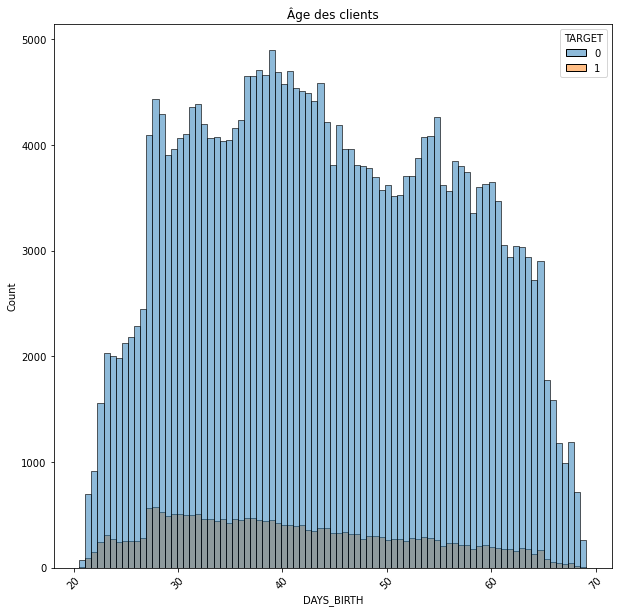

In [5]:
app_train['DAYS_BIRTH'] = np.abs(app_train['DAYS_BIRTH'])/365
app_test['DAYS_BIRTH'] = np.abs(app_test['DAYS_BIRTH'])/365

plt.rcParams["figure.figsize"] = (10, 10)
sns.histplot(data = app_train, x = 'DAYS_BIRTH', hue = 'TARGET')
plt.xticks(rotation=45)
plt.title("Âge des clients")

Maintenant que nous avons vu la colonne âge, on va regarder le nombres de jours de travail des client.

In [6]:
app_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [7]:
app_test['DAYS_EMPLOYED'].describe()

count     48744.000000
mean      67485.366322
std      144348.507136
min      -17463.000000
25%       -2910.000000
50%       -1293.000000
75%        -296.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

Text(0.5, 0, 'Days Employment')

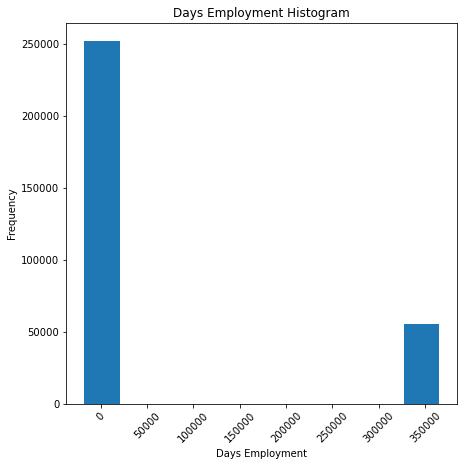

In [8]:
plt.rcParams["figure.figsize"] = (7, 7)
app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram')
plt.xticks(rotation=45)
plt.xlabel('Days Employment')

Ici, on peut voir un problème, dans le code, on peut voir que le "max" représente 1000 années. Je vais regarder si c'est un individu isolé.

In [9]:
print("%0.0f valeurs avec 365243 jours employés pour les données" % 
      len(app_train[app_train['DAYS_EMPLOYED'] == 365243]))
print("%0.0f valeurs totales des jours employés pour les données" % app_train.shape[0])
print("***********************")
print("%0.0f valeurs avec 365243 jours employés pour les données" % 
      len(app_test[app_test['DAYS_EMPLOYED'] == 365243]))
print("%0.0f valeurs totales des jours employés pour les données" % app_test.shape[0])

55374 valeurs avec 365243 jours employés pour les données
307511 valeurs totales des jours employés pour les données
***********************
9274 valeurs avec 365243 jours employés pour les données
48744 valeurs totales des jours employés pour les données


In [10]:
app_train['DAYS_EMPLOYED_OUTLIERS'] = app_train["DAYS_EMPLOYED"] == 365243
app_test['DAYS_EMPLOYED_OUTLIERS'] = app_test["DAYS_EMPLOYED"] == 365243

#Replace outliers values with nan
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
app_test['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

Text(0.5, 0, 'Days Employment')

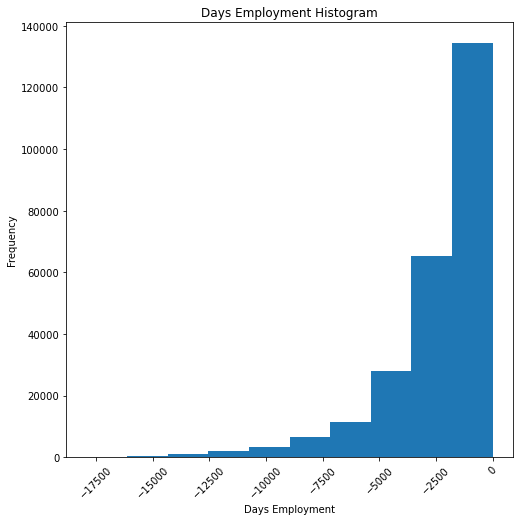

In [11]:
plt.rcParams["figure.figsize"] = (8, 8)
app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram')
plt.xticks(rotation=45)
plt.xlabel('Days Employment')

## Gestion des valeurs manquantes <a class="anchor" id="chapter2"></a>

On va s'attaquer aux valeurs manquantes, aux outliers et aux doublons.

In [12]:
col_int_train = app_train.select_dtypes(include = 'int64')
print(pd.DataFrame(col_int_train.isnull().sum().sort_values(ascending = False)))
print("############################################")
col_int_test = app_test.select_dtypes(include = 'int64')
print(pd.DataFrame(col_int_test.isnull().sum().sort_values(ascending = False)))

                             0
SK_ID_CURR                   0
FLAG_DOCUMENT_12             0
FLAG_DOCUMENT_5              0
FLAG_DOCUMENT_6              0
FLAG_DOCUMENT_7              0
FLAG_DOCUMENT_8              0
FLAG_DOCUMENT_9              0
FLAG_DOCUMENT_10             0
FLAG_DOCUMENT_11             0
FLAG_DOCUMENT_13             0
FLAG_DOCUMENT_3              0
FLAG_DOCUMENT_14             0
FLAG_DOCUMENT_15             0
FLAG_DOCUMENT_16             0
FLAG_DOCUMENT_17             0
FLAG_DOCUMENT_18             0
FLAG_DOCUMENT_19             0
FLAG_DOCUMENT_20             0
FLAG_DOCUMENT_4              0
FLAG_DOCUMENT_2              0
TARGET                       0
FLAG_EMAIL                   0
CNT_CHILDREN                 0
DAYS_ID_PUBLISH              0
FLAG_MOBIL                   0
FLAG_EMP_PHONE               0
FLAG_WORK_PHONE              0
FLAG_CONT_MOBILE             0
FLAG_PHONE                   0
REGION_RATING_CLIENT         0
LIVE_CITY_NOT_WORK_CITY      0
REGION_R

On peut voir que les valeurs entières ne possèdent pas de valeurs manquantes.

In [13]:
col_float_train = app_train.select_dtypes(include = 'float64')
print(pd.DataFrame(col_float_train.isnull().sum().sort_values(ascending = False)))
print("############################################")
col_float_test = app_test.select_dtypes(include = 'float64')
print(pd.DataFrame(col_float_test.isnull().sum().sort_values(ascending = False)))

                                 0
COMMONAREA_MODE             214865
COMMONAREA_AVG              214865
COMMONAREA_MEDI             214865
NONLIVINGAPARTMENTS_MODE    213514
NONLIVINGAPARTMENTS_MEDI    213514
...                            ...
AMT_CREDIT                       0
DAYS_REGISTRATION                0
DAYS_BIRTH                       0
REGION_POPULATION_RELATIVE       0
AMT_INCOME_TOTAL                 0

[67 rows x 1 columns]
############################################
                                0
COMMONAREA_MEDI             33495
COMMONAREA_AVG              33495
COMMONAREA_MODE             33495
NONLIVINGAPARTMENTS_AVG     33347
NONLIVINGAPARTMENTS_MODE    33347
...                           ...
DAYS_REGISTRATION               0
DAYS_BIRTH                      0
REGION_POPULATION_RELATIVE      0
AMT_GOODS_PRICE                 0
AMT_INCOME_TOTAL                0

[67 rows x 1 columns]


Pour les float, on va regarder comment on va imputer les valeurs manquantes.

In [14]:
col_obj_train = app_train.select_dtypes(include = 'object')
print(pd.DataFrame(col_obj_train.isnull().sum().sort_values(ascending = False)))
print("############################################")
col_obj_test = app_test.select_dtypes(include = 'object')
print(pd.DataFrame(col_obj_test.isnull().sum().sort_values(ascending = False)))

                                 0
FONDKAPREMONT_MODE          210295
WALLSMATERIAL_MODE          156341
HOUSETYPE_MODE              154297
EMERGENCYSTATE_MODE         145755
OCCUPATION_TYPE              96391
NAME_TYPE_SUITE               1292
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
FLAG_OWN_REALTY                  0
NAME_INCOME_TYPE                 0
NAME_EDUCATION_TYPE              0
NAME_FAMILY_STATUS               0
NAME_HOUSING_TYPE                0
WEEKDAY_APPR_PROCESS_START       0
ORGANIZATION_TYPE                0
############################################
                                0
FONDKAPREMONT_MODE          32797
WALLSMATERIAL_MODE          23893
HOUSETYPE_MODE              23619
EMERGENCYSTATE_MODE         22209
OCCUPATION_TYPE             15605
NAME_TYPE_SUITE               911
NAME_CONTRACT_TYPE              0
CODE_GENDER                     0
FLAG_OWN_CAR                    0
FLAG_OWN_REALTY     

On va examiner les 6 variables qui possèdent des valeurs manquantes et on va remplacer les valeurs manquantes soit par les valeurs ou il est écrit : autre, non spécifié, etc ou sinon à la valeur la plus haute.

In [15]:
col_obj_train["FONDKAPREMONT_MODE"].value_counts()

reg oper account         73830
reg oper spec account    12080
not specified             5687
org spec account          5619
Name: FONDKAPREMONT_MODE, dtype: int64

On remplacera les valeurs manquantes pas "not specified"

In [16]:
col_obj_train["WALLSMATERIAL_MODE"].value_counts()

Panel           66040
Stone, brick    64815
Block            9253
Wooden           5362
Mixed            2296
Monolithic       1779
Others           1625
Name: WALLSMATERIAL_MODE, dtype: int64

On remplacera les valeurs manquantes pas "Others"

In [17]:
col_obj_train["HOUSETYPE_MODE"].value_counts()

block of flats      150503
specific housing      1499
terraced house        1212
Name: HOUSETYPE_MODE, dtype: int64

On remplacera les valeurs manquantes pas "block of flats"

In [18]:
col_obj_train["EMERGENCYSTATE_MODE"].value_counts()

No     159428
Yes      2328
Name: EMERGENCYSTATE_MODE, dtype: int64

On remplacera les valeurs manquantes pas "No"

In [19]:
col_obj_train["OCCUPATION_TYPE"].value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

On remplacera les valeurs manquantes pas "Laborers"

In [20]:
col_obj_train["NAME_TYPE_SUITE"].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

On remplacera les valeurs manquantes pas "Unaccompanied"

### Les types 'object' <a class="anchor" id="section_1_1"></a>

In [21]:
from sklearn.impute import SimpleImputer

col = ["HOUSETYPE_MODE", "EMERGENCYSTATE_MODE", "OCCUPATION_TYPE", "NAME_TYPE_SUITE"]

imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

app_train[col] = imp.fit_transform(app_train[col])
app_test[col] = imp.fit_transform(app_test[col])

In [22]:
app_train["FONDKAPREMONT_MODE"] = app_train["FONDKAPREMONT_MODE"].fillna('not specified')
app_test["FONDKAPREMONT_MODE"] = app_test["FONDKAPREMONT_MODE"].fillna('not specified')

In [23]:
app_train["WALLSMATERIAL_MODE"] = app_train["WALLSMATERIAL_MODE"].fillna('Others')
app_test["WALLSMATERIAL_MODE"] = app_test["WALLSMATERIAL_MODE"].fillna('Others')

### Les types "float64" <a class="anchor" id="section_2_2"></a>

In [24]:
col = col_float_train.columns
data_imputed = app_train[col]
imp = SimpleImputer(missing_values=np.nan, strategy='median')
app_train.loc[:,col] = imp.fit_transform(data_imputed[col])

col = col_float_test.columns
data_imputed = app_test[col]
imp = SimpleImputer(missing_values=np.nan, strategy='median')
app_test.loc[:,col] = imp.fit_transform(data_imputed[col])

## Gestion des doublons <a class="anchor" id="chapter3"></a>

Les données sont maintenant complète, on supprime les doublons de nos deux dossiers.

In [ ]:
app_train.drop_duplicates(inplace = True)
app_test.drop_duplicates(inplace = True)

## Exportation des données <a class="anchor" id="chapter4"></a>

Pour ne pas avoir à relancer les codes, on va sauvegarder les tableaux et créer un dossier?

In [ ]:
# On sauvegarde les fichiers dans le dosseri data
app_train.to_csv("data/app_train.csv", index=False)
app_test.to_csv("data/app_test.csv", index=False)